In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("TaxiFare.csv")
df.shape

(50000, 8)

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.drop("unique_id",axis=1,inplace=True)

In [5]:
df.shape

(50000, 7)

#### changing column names

In [6]:
df.columns=["amount","datetime","long_pick","lat_pick","long_drop","lat_drop","passcount"]

In [7]:
df.columns

Index(['amount', 'datetime', 'long_pick', 'lat_pick', 'long_drop', 'lat_drop',
       'passcount'],
      dtype='object')

In [ ]:
## target variable - amount

#### checking null and duplicate values

In [8]:
def prepros(x):
    print("Num of rows,columns: ",x.shape)
    print("*"*30)
    print("Column names:\n",x.columns)
    print("*"*30)
    print("Column wise count of null values:\n",x.isnull().sum())
    print("*"*30)
    print("Number of duplicate values: ",x.duplicated().sum())
    print("*"*30)
    print("Datatypes of columns:\n",x.dtypes)

In [9]:
prepros(df)

Num of rows,columns:  (50000, 7)
******************************
Column names:
 Index(['amount', 'datetime', 'long_pick', 'lat_pick', 'long_drop', 'lat_drop',
       'passcount'],
      dtype='object')
******************************
Column wise count of null values:
 amount       0
datetime     0
long_pick    0
lat_pick     0
long_drop    0
lat_drop     0
passcount    0
dtype: int64
******************************
Number of duplicate values:  0
******************************
Datatypes of columns:
 amount       float64
datetime      object
long_pick    float64
lat_pick     float64
long_drop    float64
lat_drop     float64
passcount      int64
dtype: object


### inference<br>--no null values<br>--no duplicate values


In [10]:
df["datetime"]=pd.to_datetime(df["datetime"])

### creating new features 

In [11]:
df["year"]=df["datetime"].dt.year
df["quarter"]=df["datetime"].dt.quarter
df["month"]=df["datetime"].dt.month
df["day"]=df["datetime"].dt.day

In [12]:
df["hour"]=df["datetime"].dt.hour
df["minute"]=df["datetime"].dt.minute

In [46]:
df.drop("datetime",axis=1,inplace=True)

In [15]:
#### calculating distance unsing latitudes and longitudes

In [13]:
def dist(x1,x2,y1,y2,p):
    min_dist=(abs(x2-x1)**p+abs(y2-y1)**p)**(1/p)
    return min_dist

In [14]:
def haversine(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2= map(np.radians,[lon1,lat1,lon2,lat2])
    dlon =lon2 - lon1
    dlat= lat2 - lat1
    a= np.sin(dlat/2.0)**2+ np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    c= 2* np.arcsin(np.sqrt(a))
    km= 6378*c
    return km   

In [15]:
df["manhattan_dist"]=dist(df["lat_pick"],df["lat_drop"],df["long_pick"],df["long_pick"],1)
df["euclid_dist"]=dist(df["lat_pick"],df["lat_drop"],df["long_pick"],df["long_pick"],2)
df["haversine_dist"]=haversine(df["long_pick"],df["lat_pick"],df["long_drop"],df["lat_drop"])

In [16]:
df["abs_longdiff"]=abs(df["long_pick"]-df["long_drop"])
df["abs_latdiff"]=abs(df["lat_pick"]-df["lat_drop"])

In [17]:
prepros(df)

Num of rows,columns:  (50000, 18)
******************************
Column names:
 Index(['amount', 'datetime', 'long_pick', 'lat_pick', 'long_drop', 'lat_drop',
       'passcount', 'year', 'quarter', 'month', 'day', 'hour', 'minute',
       'manhattan_dist', 'euclid_dist', 'haversine_dist', 'abs_longdiff',
       'abs_latdiff'],
      dtype='object')
******************************
Column wise count of null values:
 amount            0
datetime          0
long_pick         0
lat_pick          0
long_drop         0
lat_drop          0
passcount         0
year              0
quarter           0
month             0
day               0
hour              0
minute            0
manhattan_dist    0
euclid_dist       0
haversine_dist    0
abs_longdiff      0
abs_latdiff       0
dtype: int64
******************************
Number of duplicate values:  0
******************************
Datatypes of columns:
 amount                        float64
datetime          datetime64[ns, UTC]
long_pick         

# EDA

In [18]:
df.columns

Index(['amount', 'datetime', 'long_pick', 'lat_pick', 'long_drop', 'lat_drop',
       'passcount', 'year', 'quarter', 'month', 'day', 'hour', 'minute',
       'manhattan_dist', 'euclid_dist', 'haversine_dist', 'abs_longdiff',
       'abs_latdiff'],
      dtype='object')

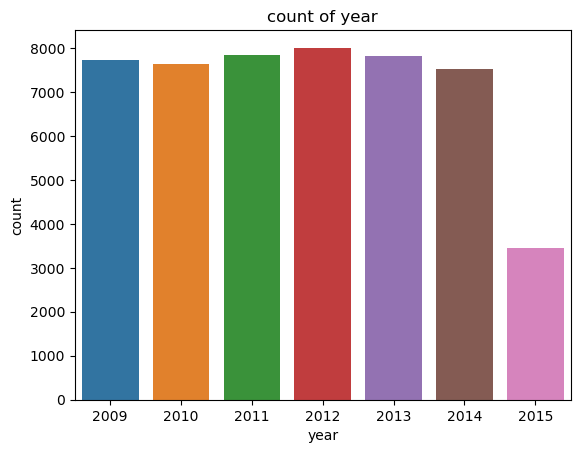

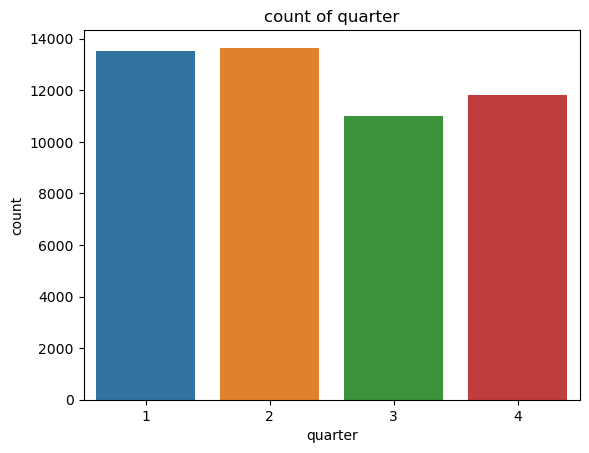

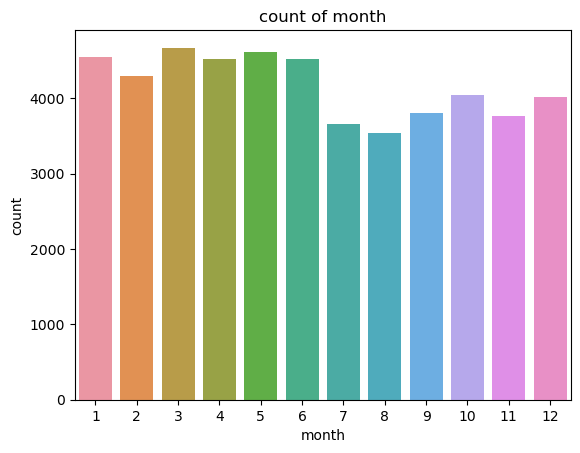

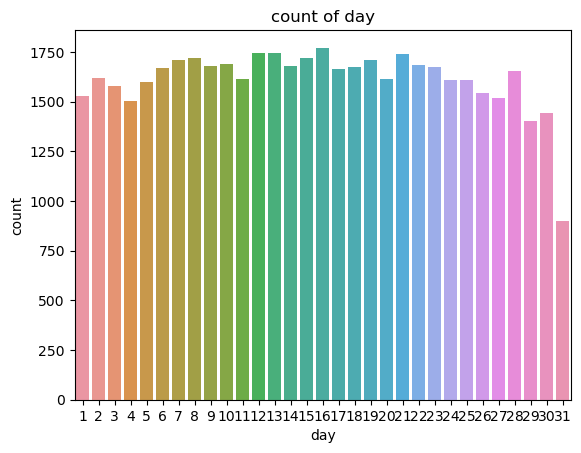

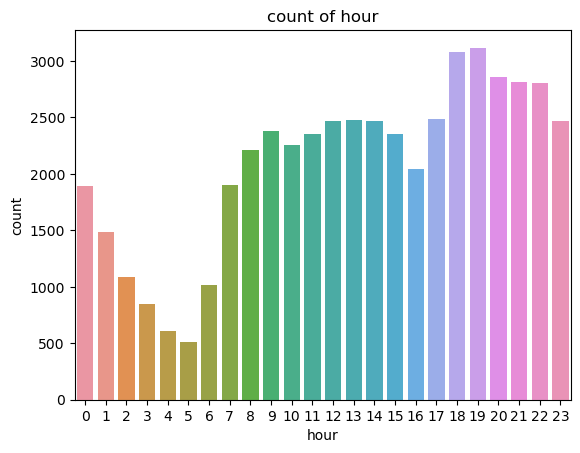

In [19]:
for i in ('year', 'quarter', 'month', 'day', 'hour'):
    sns.countplot(x=df[i])
    plt.title(f'count of {i}')
    plt.show()

## inference
<pre>
1) max rides were booked in 1st and 2nd quarter
2) max rides were booked in jan,march, apr, may,june
3) max rides were booked in middle of the month and min were booked in the month end
4) min rides were between 2am-5am and max rides were booked between 6pm-10pm
</pre>

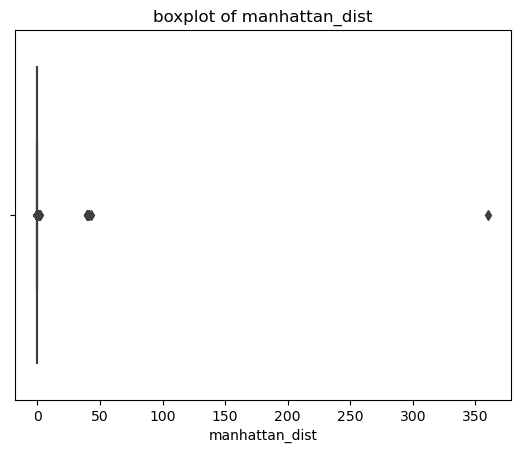

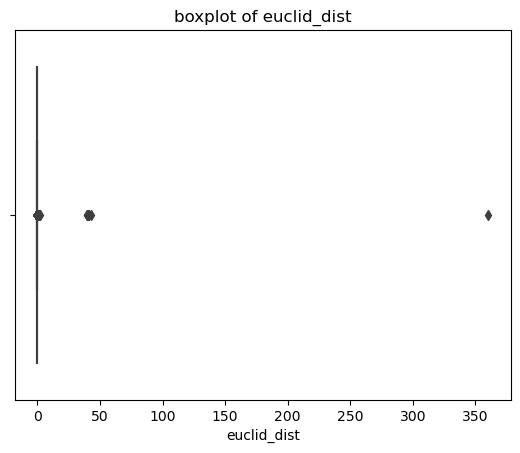

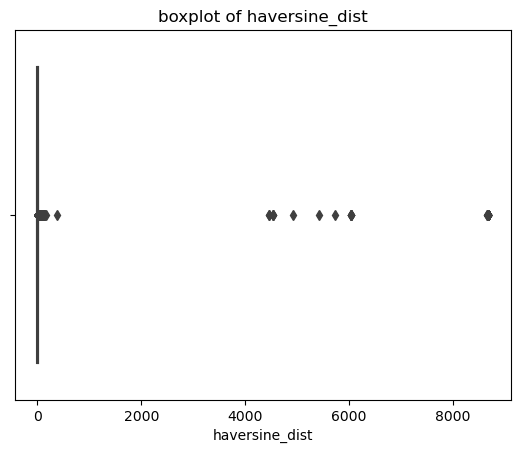

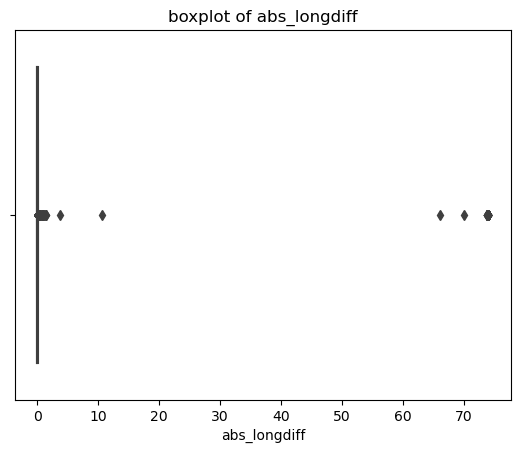

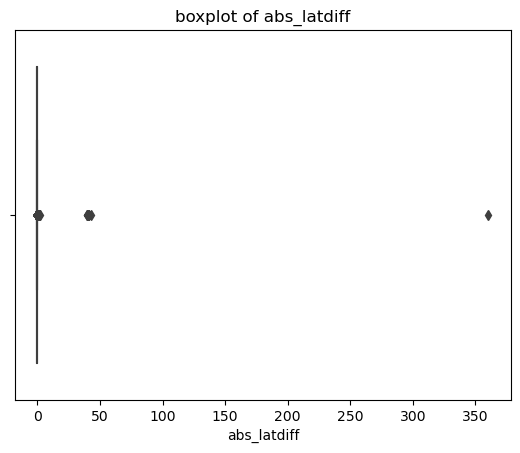

In [20]:
for i in ('manhattan_dist', 'euclid_dist', 'haversine_dist', 'abs_longdiff','abs_latdiff'):
    sns.boxplot(x=df[i])
    plt.title(f'boxplot of {i}')
    plt.show()

In [22]:
df[['manhattan_dist', 'euclid_dist', 'haversine_dist', 'abs_longdiff','abs_latdiff']].describe(percentiles=[0.01,0.05,0.1,0.3,0.5,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,30%,50%,90%,95%,99%,max
manhattan_dist,50000.0,0.097776,2.326365,0.0,0.0,0.000606,0.002385,0.007919,0.013928,0.047164,0.065390,0.120415,360.304405
euclid_dist,50000.0,0.097776,2.326365,0.0,0.0,0.000606,0.002385,0.007919,0.013928,0.047164,0.065390,0.120415,360.304405
haversine_dist,50000.0,18.529283,355.954978,0.0,0.0,0.429137,0.722382,1.377557,2.122444,7.067070,10.142541,20.797489,8677.342393
abs_longdiff,50000.0,0.151433,3.077049,0.0,0.0,0.000455,0.001818,0.007034,0.012526,0.044447,0.099853,0.200164,74.014917
abs_latdiff,50000.0,0.097776,2.326365,0.0,0.0,0.000606,0.002385,0.007919,0.013928,0.047164,0.065390,0.120415,360.304405


In [23]:
df[df["manhattan_dist"]>0.120415].shape

(501, 18)

In [24]:
df[df["euclid_dist"]>0.120415].shape

(501, 18)

In [25]:
df[df["haversine_dist"]>20.797489].shape

(500, 18)

In [26]:
df[df["abs_longdiff"]>0.200164].shape

(500, 18)

In [27]:
df[df["abs_latdiff"]>0.120415].shape

(501, 18)

In [28]:
df1= df.copy()

In [30]:
df2= df.copy()

## dropping outliers

In [31]:
df = df[df["abs_latdiff"]<0.120415]

In [33]:
df=df[df["abs_longdiff"]<0.200164]
df= df[df["haversine_dist"]<20.797489]
df= df[df["euclid_dist"]<0.120415]
df= df[df["manhattan_dist"]<0.120415]

In [34]:
df.shape

(49087, 18)

## Correlation between independent variables

In [35]:
corr = df.corr()

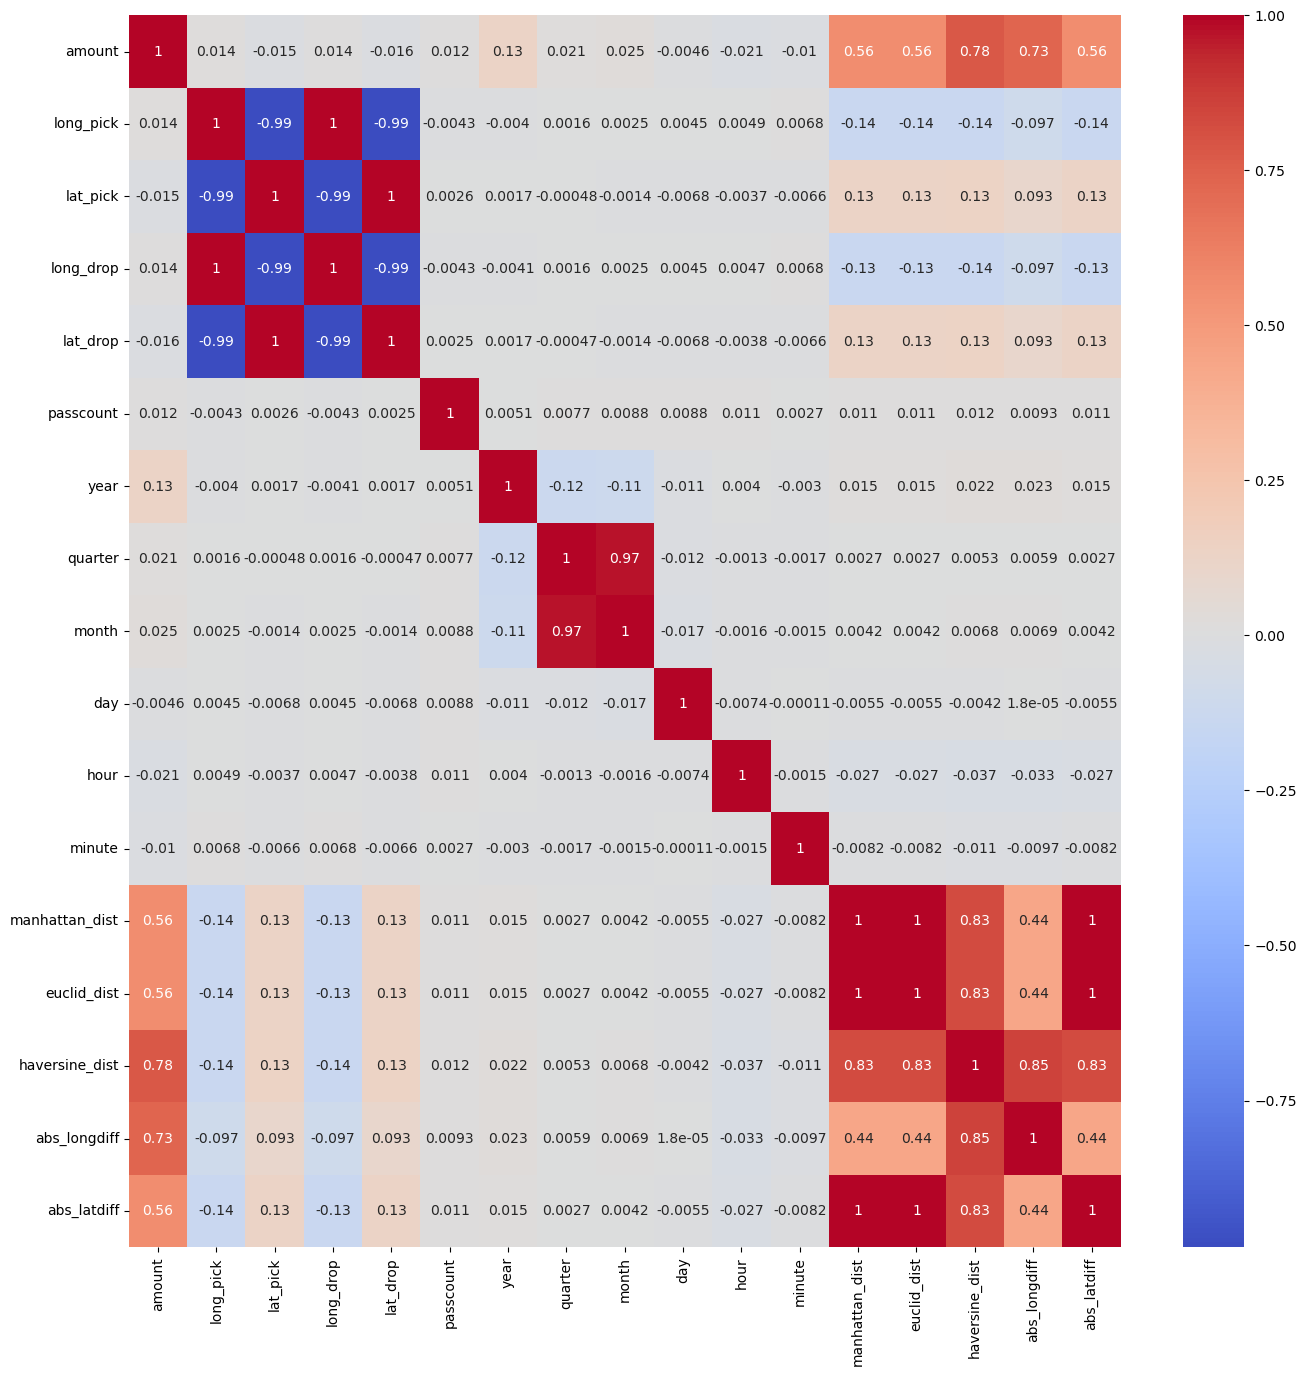

In [37]:
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [38]:
def hig_corr(corr,thresh):
    res=[]
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>=thresh:
                res.append(corr.columns[i])
    res= list(set(res))  
    return res

feat_drop= hig_corr(corr,0.9)
print(feat_drop)  

['lat_pick', 'euclid_dist', 'long_drop', 'month', 'lat_drop', 'abs_latdiff']


## splitting the data

In [39]:
from sklearn.model_selection import train_test_split

In [47]:
x= df.drop("amount",axis=1)
y= df["amount"]

In [48]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=100)
print(x_train.shape)
print(x_test.shape)

(34360, 16)
(14727, 16)


### Model building 

In [51]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [69]:
def eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred_train=model.predict(x_train)
    ypred_test=model.predict(x_test)

    mse_train = mean_squared_error(y_train,ypred_train)
    mse_test = mean_squared_error(y_test,ypred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    result= {'MsE for train':mse_train,'MSE for test':mse_test,'RMSE for train':rmse_train,'RMSE for test':rmse_test}
    return result

In [72]:
rfr1= RandomForestRegressor()
res1=eval_model(rfr1,x_train,x_test,y_train,y_test)

In [73]:
res1

{'MsE for train': 2.5252819819898136,
 'MSE for test': 23.140027355250215,
 'RMSE for train': 1.5891135837283041,
 'RMSE for test': 4.810408231662903}

In [55]:
feat = pd.DataFrame({"features":x_train.columns,"importance":rfr1.feature_importances_})
features = feat.sort_values("importance",ascending=False)
features

,features,importance
13,haversine_dist,0.635093
14,abs_longdiff,0.097390
2,long_drop,0.043127
5,year,0.031442
0,long_pick,0.028249
3,lat_drop,0.027215
10,minute,0.021781
1,lat_pick,0.021417
9,hour,0.020598
8,day,0.019235


In [74]:
model1= pd.DataFrame(res1,index=["RFR(base model)"])
model1

,MsE for train,MSE for test,RMSE for train,RMSE for test
RFR(base model),2.525282,23.140027,1.589114,4.810408


In [57]:
x1 = df[["haversine_dist","abs_longdiff","long_drop","year","long_pick","lat_drop","minute","lat_pick","hour","day","month"]]

In [59]:
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y,test_size=0.30,random_state=100)
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(34360, 11)
(14727, 11)
(34360,)
(14727,)


In [75]:
rfr2= RandomForestRegressor()
res2=eval_model(rfr2,x1_train,x1_test,y1_train,y1_test)

In [76]:
model2= pd.DataFrame(res2,index=["RFR(after dropping fts)"])
model2

,MsE for train,MSE for test,RMSE for train,RMSE for test
RFR(after dropping fts),2.591039,23.320278,1.60967,4.829107


In [78]:
rfr3 = RandomForestRegressor(n_estimators=70,criterion='squared_error',
                             max_depth=10,min_samples_split=25,oob_score=True,n_jobs=-1) 
res3=eval_model(rfr3,x1_train,x1_test,y1_train,y1_test)

In [79]:
model3= pd.DataFrame(res3,index=["RFR(after pruning)"])
model3

,MsE for train,MSE for test,RMSE for train,RMSE for test
RFR(after pruning),13.130281,22.789008,3.623573,4.773783


## using GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid = { 
    'n_estimators': [50,60,70,10],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,20,25]
}

In [89]:
rf_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)

In [90]:
res4= eval_model(rf_cv,x1_train,x1_test,y1_train,y1_test)

In [91]:
print(res4)

{'MsE for train': 3.381468859034432, 'MSE for test': 22.52160096615557, 'RMSE for train': 1.8388770646876946, 'RMSE for test': 4.7456928857813345}


In [98]:
model4= pd.DataFrame(res4,index=["RFR(hyperparam tuning)"])

In [99]:
rf_cv.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 70}

In [100]:
model_res = pd.concat([model1,model2,model3,model4])
model_res

,MsE for train,MSE for test,RMSE for train,RMSE for test
RFR(base model),2.525282,23.140027,1.589114,4.810408
RFR(after dropping fts),2.591039,23.320278,1.609670,4.829107
RFR(after pruning),13.130281,22.789008,3.623573,4.773783
RFR(hyperparam tuning),3.381469,22.521601,1.838877,4.745693


In [ ]:
ypred= rf_cv.predict(x1_test)